## Introduction <a id="toc"></a>

Today we're going to look at linear regression!

### Table of Contents
1. [Import Data](#data)
2. [Scatter Plot](#scatter)
3. [Feature Engineering: Calculating Slope](#slope)
4. [Histogram](#hist)
5. [Summary Statistics](#sumstats)
6. [Initial Model](#model1)
7. [Residual Sum of Squares](#rss)
8. [Error Functions](#error)
9. [Visualizing Loss](#vizloss)
9. [Gradient Descent](#grad_desc)

## 1. Import Data <a id="data"></a>
To start, we'll need to import some data in order to perform our regression.  
Import the 'movie_data.xlsx' file as a pandas DataFrame and assign it to the variable 'df'.

In [3]:
#import the 'movie_data.xlsx' file as a pandas DataFrame and assign it to the variable df here.
import pandas as pd
df = pd.read_excel('movie_data.xlsx')

## 2. Scatter Plot <a id="scatter"></a>  
Create a Scatter Plot of the budget and  Domestic Gross (domgross)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

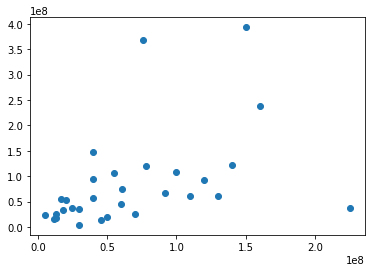

In [6]:
# Scatter Plot
plt.scatter(df.budget,df.domgross)

Hopefully you see some (weak) correlation.

Let's start thinking about linear regression in a little more depth. 
Here, we have a simple 2 variable relation. You might remember the infamous equation y=mx+b from when you took Algebra. Here we're trying to determine how the Domestic Gross Sales is related to the movie's budget. 

x - budget
y - domestic gross sales

Let's also assume that b=0 in the equation y=m*x+b.

Thus we have y=m*x+0 and solving for m, y/x=m.

Let's investigate this relationship further.

## 3. Feature Engineering: Calculating Slope <a id="slope"></a>
Create a new column m=y/x, the ratio of a movie's domestic gross sales to it's budget.

In [7]:
df['m'] = df.domgross/df.budget #write a formula to create the new column

## 4. Histogram <a id="hist"></a>  
Let's investigate the slope a bit more statistically.
Visualize the distribution of m using a histogram.

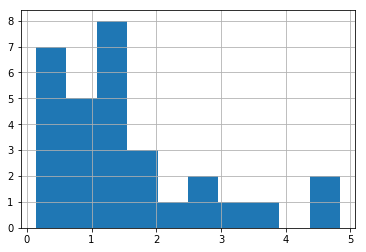

In [14]:
#Write code to display m as a histogram
df.m.hist()

## 5. Summary Statistics <a id="sumstats"></a> . 
Calculate the mean and median of m.

In [16]:
mean = df.m.mean() #your code here
median = df.m.median() #your code here
print('Mean: {}, Median: {}'.format(mean, median))

Mean: 1.574873371518024, Median: 1.3310858237179488


## 6. Initial Model <a id="model1"></a>
Create two initial models using these summary statistics.  
Each will be a linear model using that summary statistic to predict the gross domestic sales using a movie's budget.
Plot the data as a scatter plot and then draw each of these predictive models on top of the data. Be sure to include a title and use appropriate labels for the x and y axis.

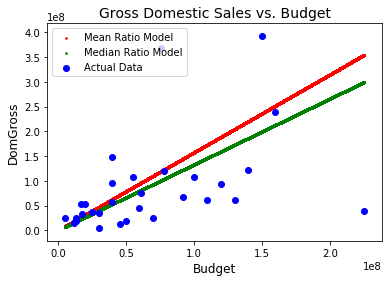

In [45]:
#Starter code
#In order to graph y = 1.575*x and y = 1.331*x,
#we'll generate a series of x-values and then calculate their associated y-values.
#Here's some x values to get you started.
x = np.linspace(start=df.budget.min(), stop=df.budget.max(), num=10**5)

#Calculate their corresponding y-values and plot the results on your graph.
#Don't forget to also graph the original data.

#Visual code here
plt.scatter(x,1.575*x, label='Mean Ratio Model',s=2.5,c='r')
plt.scatter(x,1.331*x, label='Median Ratio Model',s=2.5,c='g')
plt.scatter(df.budget, df.domgross, label='Actual Data',c='b')
plt.xlabel('Budget',fontsize=12)
plt.ylabel('DomGross',fontsize=12)
plt.title('Gross Domestic Sales vs. Budget', fontsize=14)
plt.legend(loc=2);


#Include title, xlabel, ylabel, and legend ~7 lines total

## 7. Residual Sum of Squares <a id="rss"></a>
### a. Write an error function to calculate the residual sum of squares for a given model.  
Your function should take in 3 inputs:
 * a list of x values
 * a list of y values (corresponding to the x values passed)
 * a list of $\hat{y}$ values produced by the model (corresponding to the x values passed)

In [75]:
df['1.575x'] = df.budget.astype(float)*1.575
df['1.331x'] = df.budget.astype(float)*1.331

def rss(y, y_hat):
    c = 0
    errors = []
    while c < len(y):
        errors.append((y[c]-y_hat[c])**2)
        c+=1
    return sum([error for error in errors])


In [74]:
# #OFFICIAL SOLUTION -- MY RSS DIFFERS - I THINK I AM RIGHT

# df['1.575x'] = df.budget.astype(float)*1.575
# df['1.331x'] = df.budget.astype(float)*1.331

# def rss(residual_col):
#     return sum(residual_col.astype(float).map(lambda x: x**2))
# for col in ['1.575x','1.331x']:
#     print('Residual Sum of Squares for {}: {}'.format(col, rss(df[col])))



### b. Now use your residual sum of squares function to evaluate each of the previous 2 models.

In [80]:
print('Residual Sum of Squares for 1.575x (mean ratio) is ',rss(df.domgross,df['1.575x']))
print('Residual Sum of Squares for 1.331x (median ratio) is ',rss(df.domgross,df['1.331x']))

Residual Sum of Squares for 1.575x (mean ratio) is  2.7614512142376128e+17
Residual Sum of Squares for 1.331x (median ratio) is  2.3547212057814554e+17


## Error/Loss Functions

From this you should see that the median ratio model produces a lower residual sum of squares. As such, this would be evaluated as our superior model of the two. In machine learning, we do just that; we provide an error or loss function to the learning algorithm which will then produce a model to minimize this error or loss.

In this linear regression problem, we are looking for which m will produce the minimum residual sum of squares.

Given,

$\hat{y} = m*x$

Minimize  
$ \sum(\hat{y}-y)^2$

### 8. Write a function to calculate the rss for a given slope m. <a id="error"></a>


In [92]:
def error(x, y, m):
    model = m * x
    total_rss = rss(y, model)
    return total_rss

### Gradient Descent

Now finally to use this function to find our optimal model!
Here we'll use gradient descent. From calculus, you may recall that when working on optimization problems, we often turn to derivatives. Recall that the derivative of a function at a given point is the slope of the line tangent and the rate of change at that point. As a result, whenever we have a minimum or maximum the derivative will be zero:

![](./images/maxmin2.gif)


The idea of gradient descent is we take smaller and smaller steps downhill, converging in upon a minimum. There are some caveats to this process, such as finding local minimum rather then global, but the process helps guide our search in navigating an n-dimensional space for an optimal solution.

### 9. Visualizing the Loss Function <a id="vizloss"></a>
a. Create a range of reasonbale values for m.  
b. Then calculate their associated rss scores using your error function.  
c. Plot them on a graph.  

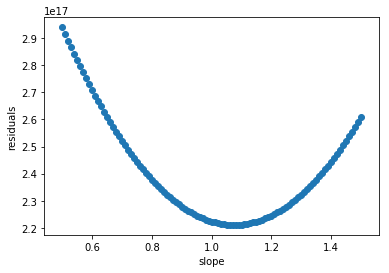

In [100]:
#Scatter Plot Code Here
ms = np.linspace(0.5,1.5,101)
errors = []

for m in ms:
    errors.append(error(df.budget,df.domgross,m))

plt.scatter(ms,errors)
plt.xlabel('slope')
plt.ylabel('residuals');

### 10. Gradient Descent. <a id="grad_desc"></a>
Now it's time to put all of this together and write a gradient descent function.  
This is ultimately the tool we will use to tune our model and find the optimal solution.  
The function should take in 5 parameters:
1. error_function; use the previous error function you defined above. we intend to minimize this
2. step_size_coefficient; this will modify how large the steps we take are
3. precision;  This will be a small parameter >= 0. 
               If an iteration does not change the result of the error function
               by this amount or more the algorithm will terminate.
4. max_iterations; Terminate the algorithm after this number of iterations.
5. start_x; The original x-value to initialize gradient descent.

**Hint:** Use the np.gradient() function to calculate the derivative at a given point for each iteration.

In [118]:
#def gradient_descent(error_function, step_size_coeff, precision, max_iterations, start_x):
    #Step 1 create a while loop that executes until the difference between one iteration
    #and the next is less then the precision value
while (previous_step_size > precision) & (iters < max_iters):
    print('Current value: {} RSS Produced: {}'.format(cur_x, error(df.budget, df.domgross, cur_x)))

    prev_x = cur_x

    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(error(df.budget, df.domgross, m)) for m in x_survey_region]

    #Step 2 calculate the gradient (the derivative)
    gradient = np.gradient(rss_survey_region)[50] 

    #Step 3 take a step in that direction
    cur_x -= gamma * gradient #Move opposite the gradient
    previous_step_size = abs(cur_x - prev_x)

    #Iterate!
    iters+=1
print("The local minimum occurs at", cur_x)

Current value: 1.5 RSS Produced: 2.6084668957174006e+17
Current value: 1.133065571442482 RSS Produced: 2.2177730533770314e+17
Current value: 1.1131830522748978 RSS Produced: 2.2135715390729424e+17
Current value: 1.1124754156940848 RSS Produced: 2.2134541499866906e+17
Current value: 1.1124506992634624 RSS Produced: 2.2134500897406422e+17
Current value: 1.1124498365366489 RSS Produced: 2.213449948066475e+17
Current value: 1.1124498064238697 RSS Produced: 2.213449943121512e+17
Current value: 1.1124498053728074 RSS Produced: 2.213449942948912e+17
The local minimum occurs at 1.1124498053361207


In [117]:
cur_x = 1.5 # The algorithm starts at x=2
gamma = 1*10**(-7) # step size multiplier
precision = 0.0000000001
previous_step_size = 1 
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter


## [Back to Top](#toc)